***Image classification***

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
mat=loadmat("data/classification3.mat")
X=mat["X"]
y=mat["y"]


In [77]:
X.shape

(5000, 400)

((5000, 400), (5000, 1))

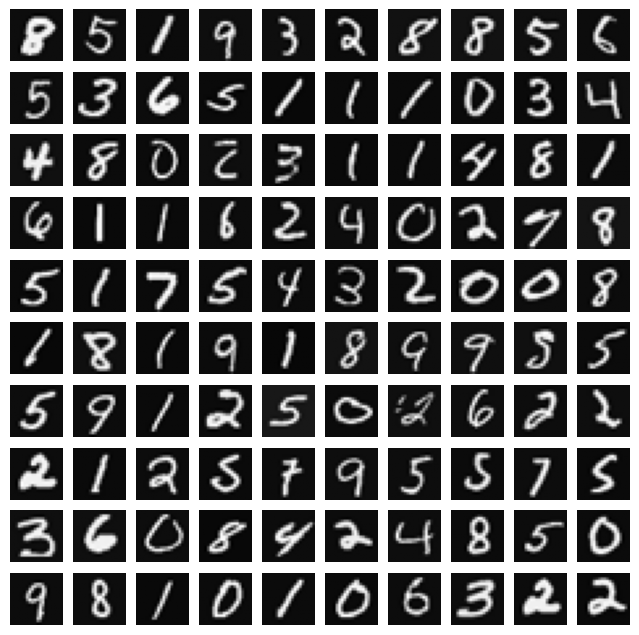

In [2]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="gray") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

X.shape,y.shape #5000 pictures with 20x20 pixels per picture. number of inputfeatures:20*20 = 400

**Dividing into train and test**

In [3]:
train_test_split = 0.8
n_classes = 10


y_mod = []

# print(y[3000])
# plt.imshow(X[3000].reshape(20,20,order="F"),cmap="gray")


for im in y:
    y_im = np.zeros((n_classes,1))
    if im == 10:
        y_im[0] = 1
    else:
        y_im[im] = 1
    y_mod.append(y_im)

y = np.array(y_mod)

In [4]:
rng = np.random.default_rng(42)

idx = rng.permutation(len(X))
X = X[idx]
y = y[idx]                               # works for (N,), (N,1) or (N,C one-hot)

In [5]:
from utils import standardize

m_train = int(len(X)*train_test_split)
X_train, y_train = X[:m_train], y[:m_train]
X_test, y_test = X[m_train:], y[m_train:]




X_train, X_test, MU_TRAIN, STD_TRAIN = standardize(X_train, X_test)


X_train.shape, y_train.shape, X_test.shape, y_test.shape, X.shape

((4000, 400), (4000, 10, 1), (1000, 400), (1000, 10, 1), (5000, 400))

In [6]:
from Model import NeuralNet
from utils import train,test



inputs_size = X_train.shape[1]
output_size = y_train[0].shape[0]
hidden_layers = [10,10]

NN_test = NeuralNet(inputs_size,hidden_layers,output_size,output="softmax")


In [7]:
from utils import cross_entropy
from utils import accuracy

single_image = X_test[0]
single_label = y_test[0]

pred_prob = NN_test.forward_prop(single_image)

print("Untrained prediction:\n", pred_prob)
print("label:",single_label)
print("Sum probabilities: ",pred_prob.sum())


pred = int(np.argmax(pred_prob)) #index of predicted label
y_ind = int(np.argmax(single_label))

print(cross_entropy(pred,y_ind))

Untrained prediction:
 [[0.21259629]
 [0.0898231 ]
 [0.03780256]
 [0.08002595]
 [0.13973678]
 [0.13541976]
 [0.04235772]
 [0.05314893]
 [0.09969555]
 [0.10939336]]
label: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
Sum probabilities:  0.9999999999999999
inf


c:\Utveksling\UFSC\Machine_learning\project\utils.py:36: RuntimeWarning: divide by zero encountered in log
  return float(-np.sum(y*np.log(p)))


In [8]:
from utils import cross_entropy
from utils import accuracy
loss_fn = cross_entropy

In [ ]:
from utils import train, test
np.random.seed(42)

NN_im = NeuralNet(X_train.shape[1],hidden_layers = [64], n_output=y_train.shape[1],output="softmax")

epochs = 5000
lr = 0.001
m = X_train.shape[0]

best_acc = -1
best_W = None
best_epoch = 0


train_loss_history = []
train_acc_history = []

test_loss_history = []
test_acc_history = []

for epoch in range(epochs):
    train_loss = 0
    train_acc = 0
    test_loss = 0
    test_acc = 0

    #training
    NN_im.Delta = NN_im.init_D()
    for i in range(m):
        pred_prob = NN_im.forward_prop(X_train[i])
        
        d = NN_im.calculate_small_delta(y_train[i])
        NN_im.calculate_big_Delta(d)
        
        train_loss +=loss_fn(pred_prob,y_train[i])/m


        pred = int(np.argmax(pred_prob)) #index of predicted label
        y_ind = int(np.argmax(y_train[i])) #handwritten number


        if pred == y_ind:
            train_acc += 1
        
    grads = [Dl / m for Dl in NN_im.Delta]

    NN_im.update_weights(grads,lr=lr)
    train_acc = train_acc/m
    
    #Testing
    for i in range(X_test.shape[0]):
        pred_prob = NN_im.forward_prop(X_test[i])

        test_loss += loss_fn(pred_prob,y_test[i])/X_test.shape[0]

        pred = int(np.argmax(pred_prob)) #index of predicted label
        y_ind = int(np.argmax(y_test[i]))


        if pred == y_ind:
            test_acc += 1

    test_acc = test_acc/X_test.shape[0]

    if test_acc>best_acc:
        best_acc = test_acc
        best_epoch = epoch
        best_W = [W.copy() for W in NN_im.W]
        print("New best acc:",test_acc, epoch)


    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    test_loss_history.append(test_loss)
    test_acc_history.append(test_acc)

    if epoch % 10 == 0:
        print(f"Epoch[{epoch}] | train loss {train_loss} - train acc {train_acc} |test loss {test_loss} - test acc {test_acc}")
    

c:\Utveksling\UFSC\Machine_learning\project\utils.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


New best acc: 0.107 0
Epoch[0] | train loss 2.598022659418922 - train acc 0.1175 |test loss 2.596655902132733 - test acc 0.107
New best acc: 0.108 1
Epoch[10] | train loss 2.586613165358407 - train acc 0.11775 |test loss 2.585574282155226 - test acc 0.108
New best acc: 0.109 12
Epoch[20] | train loss 2.575455990263647 - train acc 0.119 |test loss 2.5747401687369282 - test acc 0.108
Epoch[30] | train loss 2.5645403916568132 - train acc 0.11925 |test loss 2.5641429733910597 - test acc 0.109
New best acc: 0.11 33
New best acc: 0.111 35
Epoch[40] | train loss 2.553856251702208 - train acc 0.1205 |test loss 2.553772725314353 - test acc 0.111
New best acc: 0.112 43
New best acc: 0.113 44
Epoch[50] | train loss 2.543394037356601 - train acc 0.122 |test loss 2.543620031817714 - test acc 0.113
New best acc: 0.114 59
Epoch[60] | train loss 2.533144762979039 - train acc 0.12225 |test loss 2.53367604121358 - test acc 0.114
New best acc: 0.115 63
Epoch[70] | train loss 2.5230999552699633 - train ac

In [121]:
test_acc_history[-1], test_loss_history[-1], train_acc_history[-1], train_loss_history[-1], best_epoch

(0.771, 1.1964457311898276, 0.78875, 1.1547350821008235, 368)

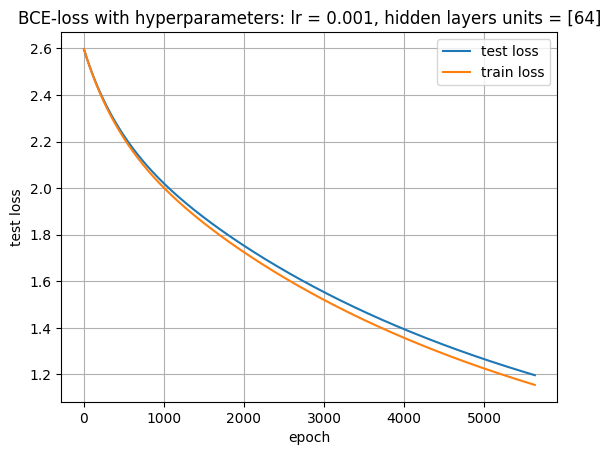

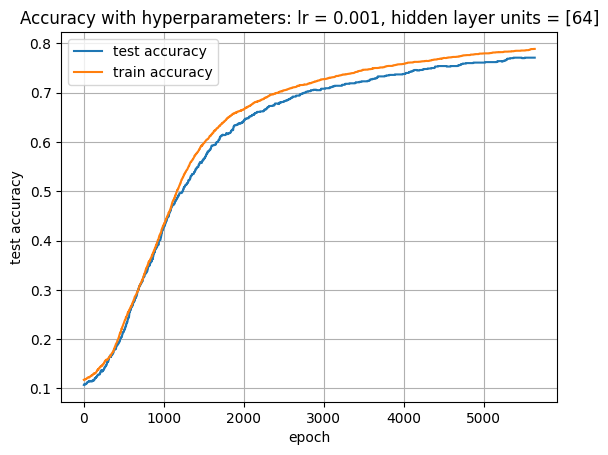

In [15]:

plt.plot(test_loss_history,label="test loss")
plt.plot(train_loss_history, label = "train loss")
plt.xlabel("epoch")
plt.ylabel("test loss")
plt.grid(True)
plt.legend()
plt.title(f"BCE-loss with hyperparameters: lr = {lr}, hidden layers units = {[NN_im.layer_sizes[1:-1]][0]}")
plt.show()

plt.plot(test_acc_history, label="test accuracy")
plt.plot(train_acc_history, label = "train accuracy")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.grid(True)
plt.legend()
plt.title(f"Accuracy with hyperparameters: lr = {lr}, hidden layer units = {[NN_im.layer_sizes[1:-1]][0]}")
plt.show()

***Barplot of plotting function***

(Plotting code generated by chatGPT)

In [101]:
misclassified_X = []
misclassified_pred = []
misclassified_true = []
misclassified_pred_prob = []


for i in range(X_test.shape[0]):
    pred_prob = NN_im.forward_prop(X_test[i])
    
    pred = int(np.argmax(pred_prob))
    true = int(np.argmax(y_test[i]))

    if pred != true:
        misclassified_X.append(X_test[i])
        misclassified_pred.append(pred)
        misclassified_true.append(true)
        misclassified_pred_prob.append(pred_prob)


c:\Utveksling\UFSC\Machine_learning\project\utils.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


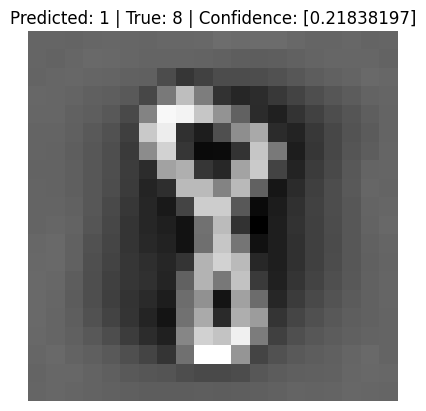

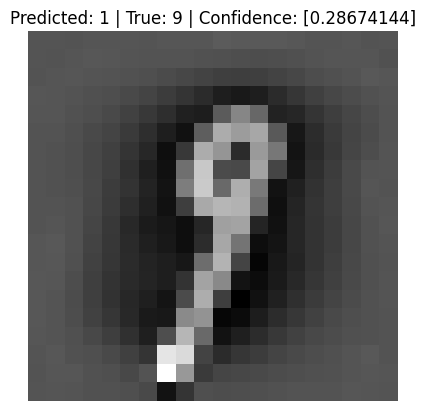

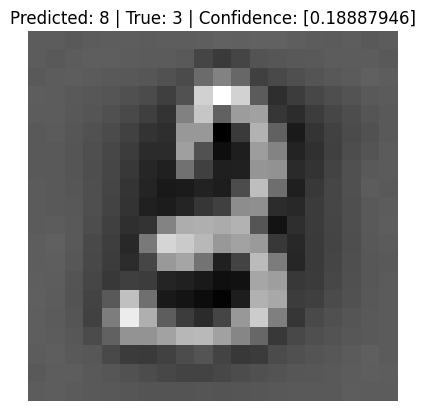

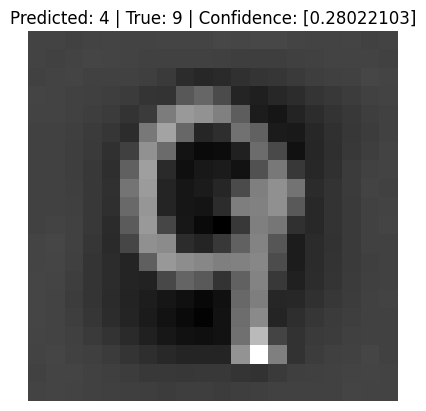

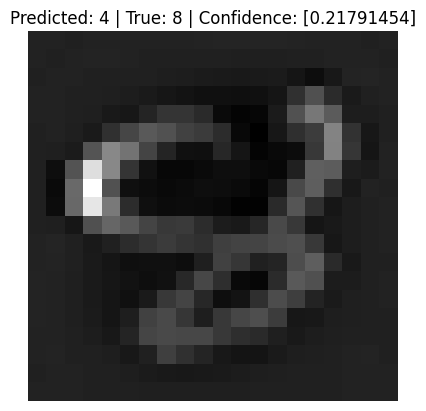

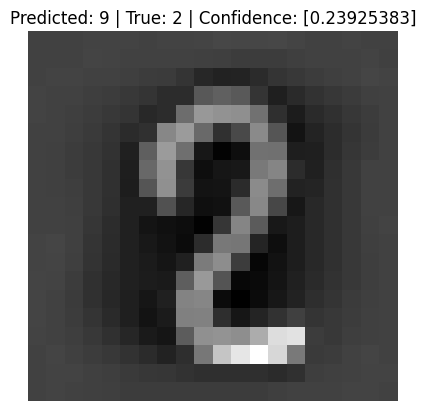

In [111]:
for i in range(6):
    plt.imshow(misclassified_X[i].reshape(20, 20, order="F"), cmap="gray")
    plt.title(f"Predicted: {misclassified_pred[i]} | True: {misclassified_true[i]} | Confidence: {max(misclassified_pred_prob[i])}")
    plt.axis('off')  # Optional: turns off axis for better visualization
    plt.show()


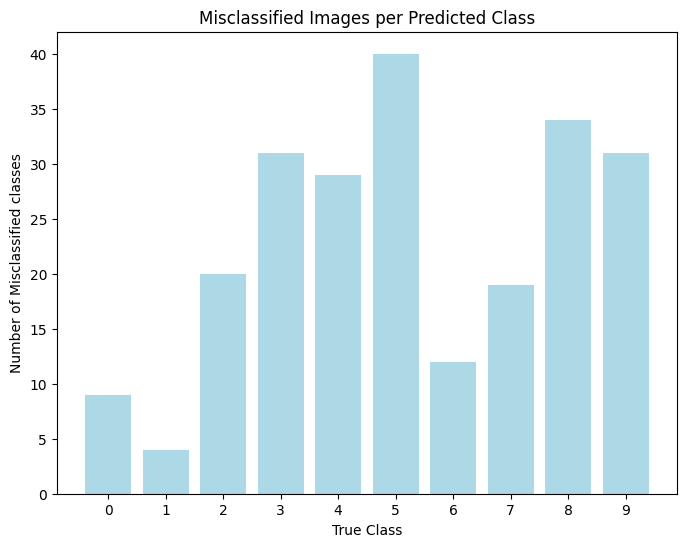

In [115]:
# Count misclassified images by predicted class
misclassified_counts = [0] * 10  # Assuming 10 classes

for true in misclassified_true:
    misclassified_counts[true] += 1

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(10), misclassified_counts, color='lightblue')
plt.xlabel('True Class')
plt.ylabel('Number of Misclassified classes')
plt.title('Misclassified Images per Predicted Class')
plt.xticks(range(10))  # Ensures we have x-ticks for each class
plt.show()
